<a href="https://colab.research.google.com/github/tatapaota/Analisis-Pengaruh-Media-Sosial-Terhadap-Kesehatan-Mental-Remaja/blob/main/KNN_TUBES_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tahap 1: Load Data & Encoding (Teks ke Angka)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. LOAD DATA ---
filename = '/content/drive/MyDrive/DATASET_TUBES_AI5/Loan_approval_data_2025.csv' # Pastikan nama file benar
df_knn = pd.read_csv(filename)

# Buang ID (Tidak berguna untuk prediksi)
if 'customer_id' in df_knn.columns:
    df_knn = df_knn.drop(columns=['customer_id'])

# --- 2. ENCODING (Ubah Teks jadi Angka) ---
# Kita simpan encoder biar tau mappingnya
le_dict = {}
kolom_kategori = df_knn.select_dtypes(include=['object']).columns

print("Melakukan Encoding kolom teks...")
for col in kolom_kategori:
    le = LabelEncoder()
    df_knn[col] = le.fit_transform(df_knn[col])
    le_dict[col] = le

print("[OK] Data sudah dalam bentuk angka.")
display(df_knn.head())

Melakukan Encoding kolom teks...
[OK] Data sudah dalam bentuk angka.


,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,0,17.2,25579,692,5.3,895,10820,0,0,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,0,7.3,43087,627,3.5,169,16550,0,1,0,2,3,53300,14.10,0.384,1.237,0.412,0
2,42,2,1.1,20840,689,8.4,17,7852,0,0,0,0,1,2100,18.33,0.377,0.101,0.034,1
3,53,2,0.5,29147,692,9.8,1480,11603,0,1,0,0,0,2900,18.74,0.398,0.099,0.033,1
4,32,0,12.5,63657,630,7.2,209,12424,0,0,0,2,2,99600,13.92,0.195,1.565,0.522,1


/tmp/ipython-input-3062687235.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='credit_score', data=df_knn, palette='Set2')


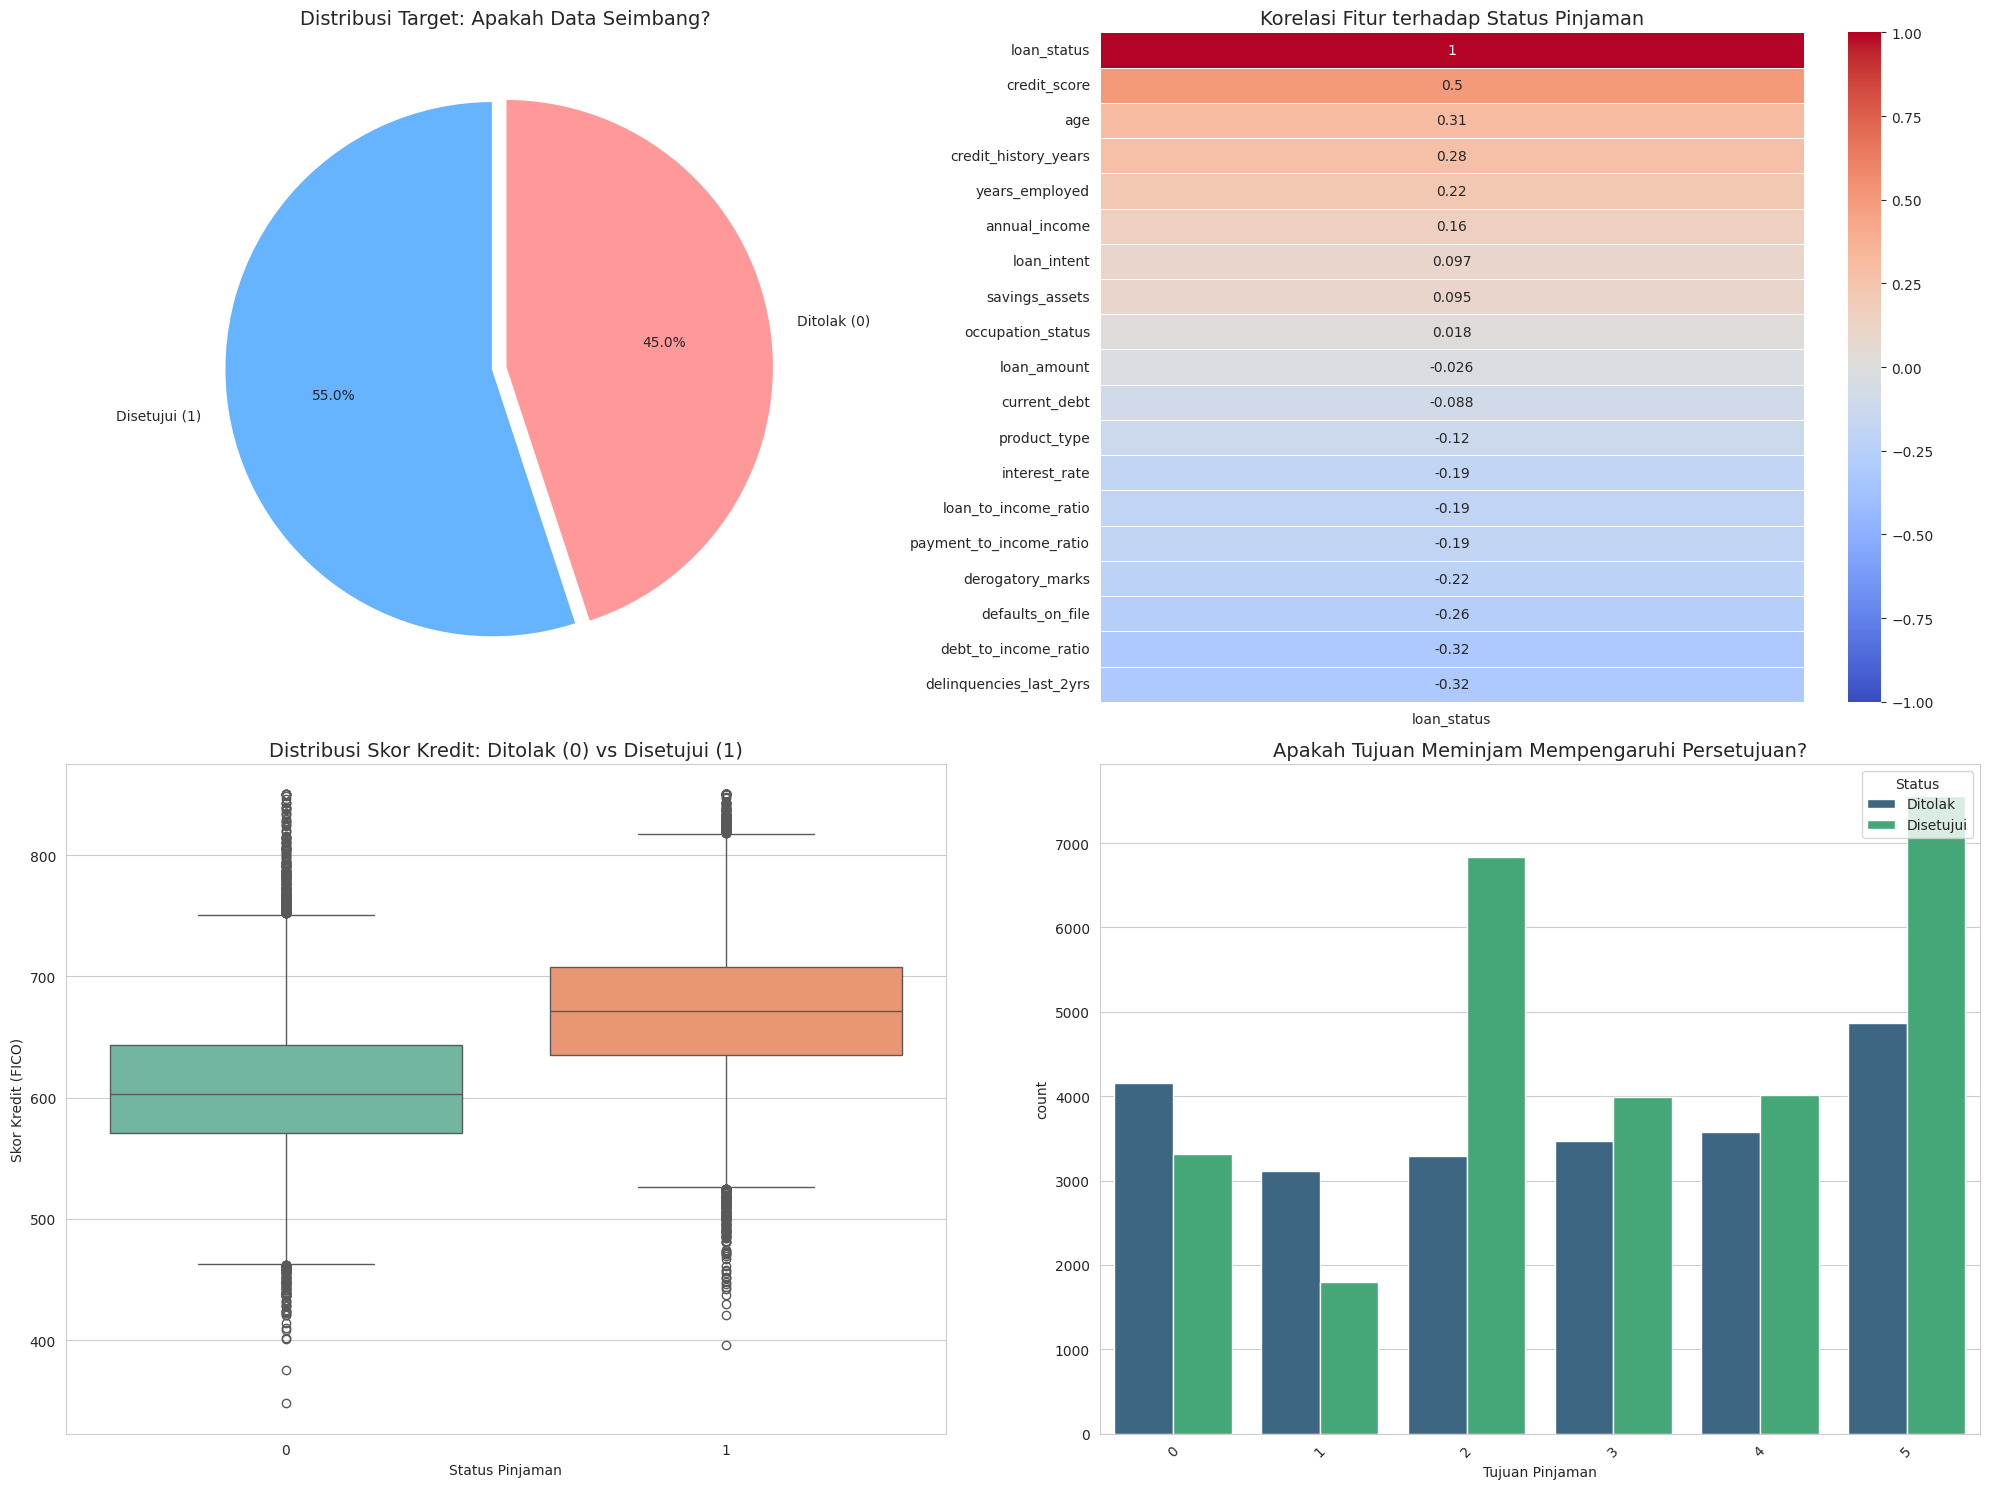

In [ ]:
# Setup tampilan grafik
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15)) # Kanvas besar untuk 4 grafik

# --- VISUALISASI 1: KESEIMBANGAN TARGET (Pie Chart) ---
plt.subplot(2, 2, 1)
counts = df_knn['loan_status'].value_counts()
plt.pie(counts, labels=['Disetujui (1)', 'Ditolak (0)'], autopct='%1.1f%%',
        colors=['#66b3ff','#ff9999'], startangle=90, explode=(0.05, 0))
plt.title('Distribusi Target: Apakah Data Seimbang?', fontsize=14)


# --- VISUALISASI 2: SIAPA RAJA FITUR? (Correlation Heatmap) ---
plt.subplot(2, 2, 2)
# Kita hanya ambil kolom angka untuk korelasi
numeric_df = df_knn.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Fokus pada korelasi terhadap 'loan_status'
# Kita sort agar yang paling berpengaruh ada di atas
sns.heatmap(corr_matrix[['loan_status']].sort_values(by='loan_status', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Korelasi Fitur terhadap Status Pinjaman', fontsize=14)


# --- VISUALISASI 3: PERAN SKOR KREDIT (Box Plot) ---
plt.subplot(2, 2, 3)
sns.boxplot(x='loan_status', y='credit_score', data=df_knn, palette='Set2')
plt.title('Distribusi Skor Kredit: Ditolak (0) vs Disetujui (1)', fontsize=14)
plt.xlabel('Status Pinjaman')
plt.ylabel('Skor Kredit (FICO)')


# --- VISUALISASI 4: TUJUAN PINJAMAN (Count Plot) ---
plt.subplot(2, 2, 4)
ax = sns.countplot(x='loan_intent', hue='loan_status', data=df_knn, palette='viridis')
plt.title('Apakah Tujuan Meminjam Mempengaruhi Persetujuan?', fontsize=14)
plt.xlabel('Tujuan Pinjaman')
plt.xticks(rotation=45) # Miringkan teks agar terbaca
plt.legend(title='Status', loc='upper right', labels=['Ditolak', 'Disetujui'])

# Tampilkan semua
plt.tight_layout()
plt.show()

### Tahap 2: Splitting

In [ ]:
# --- 1. DEFINISI X DAN y ---
# Pastikan nama kolom target sesuai dataset Anda
X = df_knn.drop(columns=['loan_status'])
y = df_knn['loan_status']

# --- 2. SPLIT DATA TERLEBIH DAHULU (CRITICAL STEP) ---
# Kita split data MENTAH sebelum disentuh scaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Ukuran Data Train: {X_train.shape}")
print(f"Ukuran Data Test : {X_test.shape}")

Ukuran Data Train: (40000, 18)
Ukuran Data Test : (10000, 18)


### Tahap 3: Feature Scaling (WAJIB untuk KNN)

In [ ]:
# --- 3. SCALING (ANTI-LEAKAGE) ---
print("\nMelakukan Scaling Data...")
scaler = StandardScaler()

# PENTING:
# .fit_transform() HANYA pada X_train (agar scaler belajar dari data latih saja)
X_train_scaled = scaler.fit_transform(X_train)

# .transform() pada X_test (menggunakan rumus scaling yang dipelajari dari X_train)
# Jangan pernah .fit() pada data test!
X_test_scaled = scaler.transform(X_test)

print("Contoh 3 baris data Train setelah scaling:")
print(X_train_scaled[:3])


Melakukan Scaling Data...
Contoh 3 baris data Train setelah scaling:
[[-1.16399661 -0.60249484 -0.6760893  -0.99052623 -1.36966946 -1.0912076
  -0.27637569 -0.98977033 -0.23909468  0.52846176  2.06432601 -1.00898083
   1.25810661 -1.21523381  1.70273245 -1.36131083 -1.3398391  -1.34191529]
 [-0.4454386   2.43523045 -0.83315887 -0.8734588  -0.22597508 -0.13511009
  -0.03671969 -0.50584146 -0.23909468 -0.65589897 -0.35781005  1.24050963
  -0.46069653 -1.21906682 -0.27525202  0.41154825 -1.38058686 -1.3805174 ]
 [-0.53525835 -0.60249484  0.29250642  0.63749357 -1.02965221 -1.04963815
  -0.27396904 -0.75064452  4.18244355  0.52846176  2.06432601  1.24050963
   1.25810661  2.56411771  0.08348802 -1.39889795  1.51679344  1.51464109]]


### Tahap 4: latih model knn

In [ ]:
# --- 4. LATIH MODEL KNN ---
k = 5
print(f"\nMelatih Model KNN dengan k={k}...")

model_knn = KNeighborsClassifier(n_neighbors=k)
# Latih menggunakan data yang SUDAH di-scaling
model_knn.fit(X_train_scaled, y_train)

print("[OK] Model KNN selesai dilatih!")


Melatih Model KNN dengan k=5...
[OK] Model KNN selesai dilatih!


Tahap: 5 model prediksi

In [ ]:
# --- 5. PREDIKSI (Opsional untuk cek error) ---
# Ingat untuk memprediksi menggunakan X_test yang sudah di-scale
print("Sedang memprediksi (KNN butuh waktu hitung jarak)...")
y_pred = model_knn.predict(X_test_scaled)

Sedang memprediksi (KNN butuh waktu hitung jarak)...


Evaluasi

AKURASI KNN (k=5): 86.21%


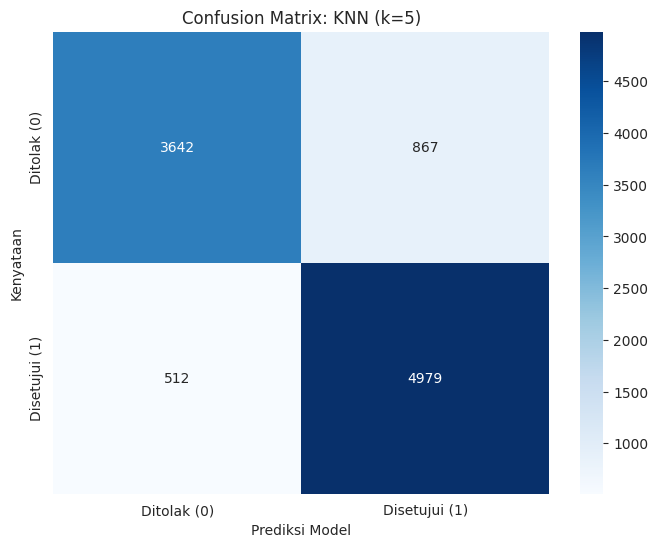


Detail Performa KNN:
               precision    recall  f1-score   support

  Ditolak (0)       0.88      0.81      0.84      4509
Disetujui (1)       0.85      0.91      0.88      5491

     accuracy                           0.86     10000
    macro avg       0.86      0.86      0.86     10000
 weighted avg       0.86      0.86      0.86     10000



In [ ]:
# --- 7. EVALUASI ---
acc_knn = accuracy_score(y_test, y_pred)

print("="*40)
print(f"AKURASI KNN (k={k}): {acc_knn * 100:.2f}%")
print("="*40)

# Visualisasi Confusion Matrix
label_target = ['Ditolak (0)', 'Disetujui (1)']
cm_knn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
# Warna 'Blues' biar adem
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_target,
            yticklabels=label_target)
plt.title(f'Confusion Matrix: KNN (k={k})')
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan')
plt.show()

print("\nDetail Performa KNN:")
print(classification_report(y_test, y_pred, target_names=label_target))

### OPTIMASI

### Mencari Nilai 'K' Terbaik

Sedang menghitung error rate untuk berbagai nilai K (Tunggu sebentar)...


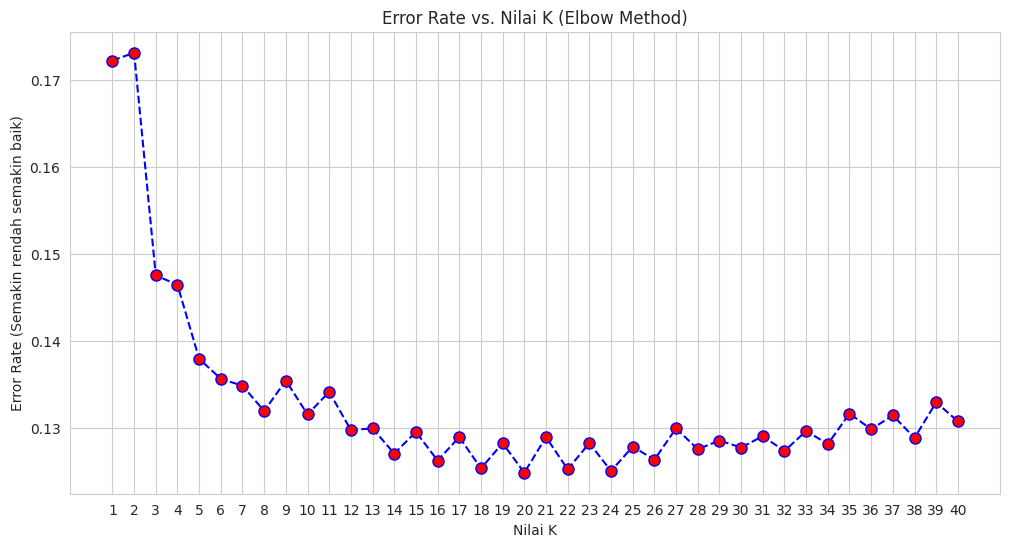

Berdasarkan grafik, Error terendah (0.1248) dicapai pada K = 20


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# --- STRATEGI 1: ELBOW METHOD ---
error_rate = []
# Kita coba rentang K dari 1 sampai 40
k_range = range(1, 41)

print("Sedang menghitung error rate untuk berbagai nilai K (Tunggu sebentar)...")

for i in k_range:
    # Gunakan metric='euclidean' agar konsisten dulu
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    # Error rate = rata-rata prediksi yang salah
    error_rate.append(np.mean(pred_i != y_test))

# Visualisasi Grafis
plt.figure(figsize=(12, 6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. Nilai K (Elbow Method)')
plt.xlabel('Nilai K')
plt.ylabel('Error Rate (Semakin rendah semakin baik)')
plt.xticks(k_range) # Agar semua angka K terlihat
plt.grid(True)
plt.show()

# Cari K dengan error terendah secara otomatis
best_k_elbow = k_range[np.argmin(error_rate)]
min_error = min(error_rate)
print(f"Berdasarkan grafik, Error terendah ({min_error:.4f}) dicapai pada K = {best_k_elbow}")

### Pelatihan Model "Super KNN"


Melatih Model FINAL KNN (K=20, Weights=distance)...
AKURASI FINAL: 87.35%


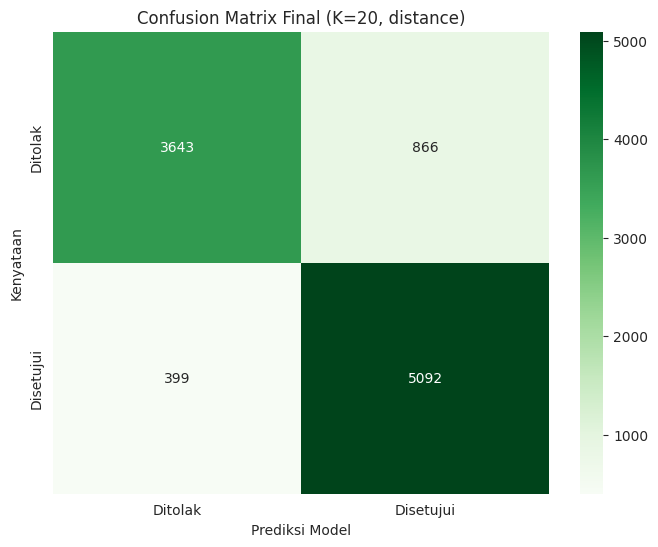


Detail Performa Final:
              precision    recall  f1-score   support

     Ditolak       0.90      0.81      0.85      4509
   Disetujui       0.85      0.93      0.89      5491

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. DEFINISIKAN PARAMETER TERBAIK DI SINI ---
# Masukkan angka yang tadi Anda temukan (20)
final_k = 20
# Kita pakai 'distance' agar K genap tidak menyebabkan hasil seri (tie)
final_weight = 'distance'

# --- 2. TRAIN ULANG DENGAN PARAMETER TERBAIK ---
print(f"\nMelatih Model FINAL KNN (K={final_k}, Weights={final_weight})...")

model_knn_final = KNeighborsClassifier(n_neighbors=final_k, weights=final_weight)
model_knn_final.fit(X_train_scaled, y_train)

# --- 3. PREDIKSI ---
y_pred_final = model_knn_final.predict(X_test_scaled)

# --- 4. EVALUASI HASIL AKHIR ---
acc_final = accuracy_score(y_test, y_pred_final)

print("="*40)
print(f"AKURASI FINAL: {acc_final * 100:.2f}%")
print("="*40)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
cm_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Ditolak', 'Disetujui'],
            yticklabels=['Ditolak', 'Disetujui'])
plt.title(f'Confusion Matrix Final (K={final_k}, {final_weight})')
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan')
plt.show()

print("\nDetail Performa Final:")
print(classification_report(y_test, y_pred_final, target_names=['Ditolak', 'Disetujui']))

--- HASIL DENGAN THRESHOLD 87.0% ---
Akurasi: 0.7566


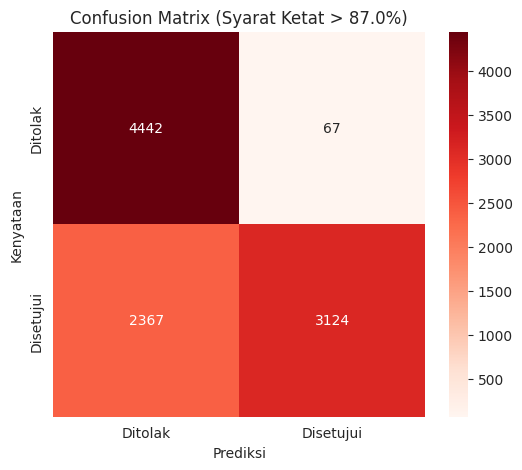

In [ ]:
# --- OPTIMASI LANJUTAN: MENGUBAH THRESHOLD ---
# Alih-alih langsung .predict(), kita minta probabilitasnya dulu
y_pred_proba = model_knn_final.predict_proba(X_test_scaled)[:, 1]

# Kita tentukan syarat lebih ketat:
# Hanya setujui jika model yakin di atas 70% (bukan 50%)
threshold_ketat = 0.87
y_pred_ketat = (y_pred_proba > threshold_ketat).astype(int)

# Evaluasi Hasil Pengetatan
print(f"--- HASIL DENGAN THRESHOLD {threshold_ketat*100}% ---")
print("Akurasi:", accuracy_score(y_test, y_pred_ketat))

# Cek apakah False Positive (Pojok Kanan Atas) turun?
cm_ketat = confusion_matrix(y_test, y_pred_ketat)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_ketat, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Ditolak', 'Disetujui'],
            yticklabels=['Ditolak', 'Disetujui'])
plt.title(f'Confusion Matrix (Syarat Ketat > {threshold_ketat*100}%)')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataan')
plt.show()

Threshold Terbaik (Seimbang) ditemukan di angka: 0.6001
Pada threshold ini, model memiliki sensitivitas 0.88 dan rate salah tangkap 0.12

CONFUSION MATRIX (Threshold Otomatis: 0.6001)


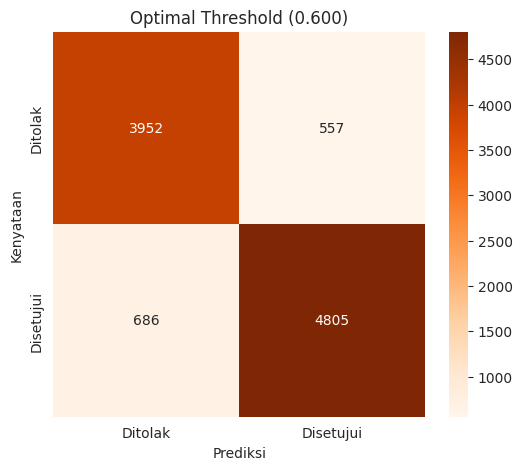

Nasabah Jahat Lolos (False Positive/Risiko): 557 orang
Nasabah Bagus Ditolak (False Negative/Lost Opportunity): 686 orang


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# --- 1. DAPATKAN PROBABILITAS (BUKAN HANYA 0/1) ---
# Kita butuh angka desimal keyakinan model (misal: 0.75, 0.45, 0.90)
y_pred_proba = model_knn_final.predict_proba(X_test_scaled)[:, 1]

# --- 2. HITUNG KURVA ROC ---
# fpr = False Positive Rate (Risiko)
# tpr = True Positive Rate (Keuntungan)
# thresholds = Titik potong yang diuji
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# --- 3. CARI THRESHOLD TERBAIK (YOUDEN'S J STATISTIC) ---
# Rumus: J = Sensitivity (TPR) - (1 - Specificity)
# Simplenya: J = TPR - FPR
J = tpr - fpr
ix = np.argmax(J) # Cari indeks di mana J paling besar
best_thresh = thresholds[ix]

print(f"Threshold Terbaik (Seimbang) ditemukan di angka: {best_thresh:.4f}")
print(f"Pada threshold ini, model memiliki sensitivitas {tpr[ix]:.2f} dan rate salah tangkap {fpr[ix]:.2f}")

# --- 4. TERAPKAN THRESHOLD TERSEBUT ---
# Jika probabilitas > best_thresh, maka setujui (1), jika tidak tolak (0)
y_pred_optimal = (y_pred_proba >= best_thresh).astype(int)

# --- 5. EVALUASI HASILNYA ---
print("\n" + "="*40)
print(f"CONFUSION MATRIX (Threshold Otomatis: {best_thresh:.4f})")
print("="*40)

cm_optimal = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Ditolak', 'Disetujui'],
            yticklabels=['Ditolak', 'Disetujui'])
plt.title(f'Optimal Threshold ({best_thresh:.3f})')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataan')
plt.show()

# Cek Metrik Bisnis
tn, fp, fn, tp = cm_optimal.ravel()
print(f"Nasabah Jahat Lolos (False Positive/Risiko): {fp} orang")
print(f"Nasabah Bagus Ditolak (False Negative/Lost Opportunity): {fn} orang")